# 로또 크롤링하기

In [85]:
from bs4 import BeautifulSoup
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
from urllib.request import urlopen
import requests
import pandas as pd
from urllib.parse import urljoin
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
url ='https://www.dhlottery.co.kr/gameResult.do?method=byWin&drwNo=1'
html = requests.get(url, headers = headers).text
soup = BeautifulSoup(html, 'html.parser')

### 로또 정보가져오기

In [33]:
# 횟수
l_time = soup.select_one('.win_result').find('strong').string
l_time

'1회'

In [34]:
# 번호
tmp = soup.select_one('.nums').find_all('span')
tmp[0].string

'10'

In [35]:
win_nums =[]

In [36]:
# 1등번호 , 2등번호
for i in range(6):
    win_nums.append(tmp[i].string)
s_win_num = tmp[-1].string

In [37]:
win_nums, s_win_num

(['10', '23', '29', '33', '37', '40'], '16')

### 상금정보

In [38]:
money = soup.select('.tar')
money

[<td class="tar"><strong class="color_key1">0원</strong></td>,
 <td class="tar">0원</td>,
 <td class="tar"><strong class="color_key1">143,934,100원</strong></td>,
 <td class="tar">143,934,100원</td>,
 <td class="tar"><strong class="color_key1">143,934,000원</strong></td>,
 <td class="tar">5,140,500원</td>,
 <td class="tar"><strong class="color_key1">287,695,800원</strong></td>,
 <td class="tar">113,400원</td>,
 <td class="tar"><strong class="color_key1">401,550,000원</strong></td>,
 <td class="tar">10,000원</td>]

### prize = 총상금 , mean = 인당 , win_per = 당첨인원 , 총상금 _n = 등수

In [39]:
prize_1 = money[0].string.strip('원').replace(',','')
prize_1

'0'

In [40]:
mean_1 = money[1].string.strip('원').replace(',','')
mean_1

'0'

In [41]:
prize_2 = money[2].string.strip('원').replace(',','')
prize_2

'143934100'

In [42]:
mean_2 = money[3].string.strip('원').replace(',','')
mean_2

'143934100'

In [43]:
prize_3 = money[4].string.strip('원').replace(',','')
prize_3

'143934000'

In [44]:
mean_3 = money[5].string.strip('원').replace(',','')
mean_3

'5140500'

In [45]:
prize_4 = money[6].string.strip('원').replace(',','')
prize_4

'287695800'

In [46]:
mean_4 = money[7].string.strip('원').replace(',','')
mean_4

'113400'

In [47]:
prize_5 = money[8].string.strip('원').replace(',','')
prize_5

'401550000'

In [48]:
mean_5 = money[9].string.strip('원').replace(',','')
mean_5

'10000'

In [49]:
win_per_1 = soup.find('tbody').find_all('td')[2].string
win_per_1

'0'

In [50]:
win_per_2 = soup.find('tbody').find_all('td')[8].string
win_per_2

'1'

In [51]:
win_per_3 = soup.find('tbody').find_all('td')[13].string.replace(',','')
win_per_3

'28'

In [52]:
win_per_4 =soup.find('tbody').find_all('td')[-8].string.replace(',','')
win_per_4

'2537'

In [53]:
win_per_5 = soup.find('tbody').find_all('td')[-3].string.replace(',','')
win_per_5

'40155'

In [54]:
total_prize = soup.select_one('.list_text_common').find('strong').string.replace(',','').strip('원')
total_prize

'3681782000'

### 샘플만들기

In [55]:
l_nums =[]; l2_nums =[]; prize_1 = []; prize_2=[]; prize_3=[]; prize_4 =[]; prize_5=[]
mean_1=[]; mean_2=[]; mean_3 =[]; mean_4 =[]; mean_5 =[]; win_per_1=[] ; win_per_2=[]
win_per_3 =[]; win_per_4 = []; win_per_5 = []; total_sells = [] 
l_times= []

In [56]:
l_times.append(soup.select_one('.win_result').find('strong').string)
tmp = soup.select_one('.nums').find_all('span')
win_nums =[]
for i in range(6):
    win_nums.append(tmp[i].string)
s_win_num = tmp[-1].string
l_nums.append(win_nums)
l2_nums.append(s_win_num)
money = soup.select('.tar')
prize_1.append(int(money[0].string.strip('원').replace(',','')))
prize_2.append(int(money[2].string.strip('원').replace(',','')))
prize_3.append(int(money[4].string.strip('원').replace(',','')))
prize_4.append(int(money[6].string.strip('원').replace(',','')))
prize_5.append(int(money[8].string.strip('원').replace(',','')))
mean_1.append(int(money[1].string.strip('원').replace(',','')))
mean_2.append(int(money[3].string.strip('원').replace(',','')))
mean_3.append(int(money[5].string.strip('원').replace(',','')))
mean_4.append(int(money[7].string.strip('원').replace(',','')))
mean_5.append(int(money[9].string.strip('원').replace(',','')))
win_per_1.append(soup.find('tbody').find_all('td')[2].string)
win_per_2.append(soup.find('tbody').find_all('td')[8].string)
win_per_3.append(soup.find('tbody').find_all('td')[13].string.replace(',',''))
win_per_4.append(soup.find('tbody').find_all('td')[-8].string.replace(',',''))
win_per_5.append(soup.find('tbody').find_all('td')[-3].string.replace(',',''))
total_sells.append(soup.select_one('.list_text_common').find('strong').string.replace(',','').strip('원'))

In [57]:
spdf = pd.DataFrame({
    '회차' : l_times,
    '1등총당첨액' : prize_1,
    '2등총당첨액' : prize_2,
    '3등총당첨액' : prize_3,
    '4등총당첨액' : prize_4,
    '5등총당첨액' : prize_5,
    '인당1등당첨액' : mean_1,
    '인당2등당첨액' : mean_2,
    '인당3등당첨액' : mean_3,
    '인당4등당첨액' : mean_4,
    '인당5등당첨액' : mean_5,
    '1등당첨인원수' : win_per_1,
    '2등당첨인원수' : win_per_2,
    '3등당첨인원수' : win_per_3,
    '4등당첨인원수' : win_per_4,
    '5등당첨인원수' : win_per_5,
    '총판매금액' :  total_sells
})

In [58]:
spdf

,회차,1등총당첨액,2등총당첨액,3등총당첨액,4등총당첨액,5등총당첨액,인당1등당첨액,인당2등당첨액,인당3등당첨액,인당4등당첨액,인당5등당첨액,1등당첨인원수,2등당첨인원수,3등당첨인원수,4등당첨인원수,5등당첨인원수,총판매금액
0,1회,0,143934100,143934000,287695800,401550000,0,143934100,5140500,113400,10000,0,1,28,2537,40155,3681782000


In [60]:
spn = pd.DataFrame({
    '회차' : l_times,
    '번호1' : win_nums[0],
    '번호2' : win_nums[1],
    '번호3' : win_nums[2],
    '번호4' : win_nums[3],
    '번호5' : win_nums[4],
    '번호6' : win_nums[5],
    '2등번호' : s_win_num
})

In [61]:
spn

,회차,번호1,번호2,번호3,번호4,번호5,번호6,2등번호
0,1회,10,23,29,33,37,40,16


### 진짜 만들기

In [64]:
url ='https://www.dhlottery.co.kr/gameResult.do?method=byWin&drwNo=1'
html = requests.get(url, headers = headers).text
soup = BeautifulSoup(html, 'html.parser')

#### 총페이지 찾기

In [65]:
page = soup.select_one('.inner').find('option').get_text()
page

'937'

In [66]:
page = int(page)

#### 페이지 이용해서 만들기

In [67]:
l2_nums =[]; prize_1 = []; prize_2=[]; prize_3=[]; prize_4 =[]; prize_5=[]
mean_1=[]; mean_2=[]; mean_3 =[]; mean_4 =[]; mean_5 =[]; win_per_1=[] ; win_per_2=[]
win_per_3 =[]; win_per_4 = []; win_per_5 = []; total_sells = [] 
l_times =[]; l_1nums= []; l_2nums =[]; l_3nums=[]; l_4nums=[] ; l_5nums=[] ; l_6nums=[]

In [68]:
for lotto in range(page):
    url = f'https://www.dhlottery.co.kr/gameResult.do?method=byWin&drwNo={lotto+1}'
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
    html = requests.get(url, headers = headers).text
    soup = BeautifulSoup(html, 'html.parser')
    l_times.append(soup.select_one('.win_result').find('strong').string.strip('회'))
    tmp = soup.select_one('.nums').find_all('span')
    s_win_num = tmp[-1].string
    l_1nums.append(tmp[0].string)
    l_2nums.append(tmp[1].string)
    l_3nums.append(tmp[2].string)
    l_4nums.append(tmp[3].string)
    l_5nums.append(tmp[4].string)
    l_6nums.append(tmp[5].string)
    l2_nums.append(s_win_num)
    money = soup.select('.tar')
    prize_1.append(int(money[0].string.strip('원').replace(',','')))
    prize_2.append(int(money[2].string.strip('원').replace(',','')))
    prize_3.append(int(money[4].string.strip('원').replace(',','')))
    prize_4.append(int(money[6].string.strip('원').replace(',','')))
    prize_5.append(int(money[8].string.strip('원').replace(',','')))
    mean_1.append(int(money[1].string.strip('원').replace(',','')))
    mean_2.append(int(money[3].string.strip('원').replace(',','')))
    mean_3.append(int(money[5].string.strip('원').replace(',','')))
    mean_4.append(int(money[7].string.strip('원').replace(',','')))
    mean_5.append(int(money[9].string.strip('원').replace(',','')))
    win_per_1.append(int(soup.find('tbody').find_all('td')[2].string))
    win_per_2.append(int(soup.find('tbody').find_all('td')[8].string))
    win_per_3.append(int(soup.find('tbody').find_all('td')[13].string.replace(',','')))
    win_per_4.append(int(soup.find('tbody').find_all('td')[-8].string.replace(',','')))
    win_per_5.append(int(soup.find('tbody').find_all('td')[-3].string.replace(',','')))
    total_sells.append(int(soup.select_one('.list_text_common').find('strong').string.replace(',','').strip('원')))

In [69]:
lotto_df= pd.DataFrame({
    '회차' : l_times,
    '1등총당첨액' : prize_1,
    '2등총당첨액' : prize_2,
    '3등총당첨액' : prize_3,
    '4등총당첨액' : prize_4,
    '5등총당첨액' : prize_5,
    '인당1등당첨액' : mean_1,
    '인당2등당첨액' : mean_2,
    '인당3등당첨액' : mean_3,
    '인당4등당첨액' : mean_4,
    '인당5등당첨액' : mean_5,
    '1등당첨인원수' : win_per_1,
    '2등당첨인원수' : win_per_2,
    '3등당첨인원수' : win_per_3,
    '4등당첨인원수' : win_per_4,
    '5등당첨인원수' : win_per_5,
    '총판매금액' :  total_sells
})
lotto_df = lotto_df.set_index('회차')

In [70]:
lotto_num_df = pd.DataFrame({
    '회차' : l_times,
    '번호1' : l_1nums,
    '번호2' : l_2nums,
    '번호3' : l_3nums,
    '번호4' : l_4nums,
    '번호5' : l_5nums,
    '번호6' : l_6nums,
    '2등번호' : l2_nums
})
lotto_num_df = lotto_num_df.set_index('회차')

In [71]:
lotto_df

,1등총당첨액,2등총당첨액,3등총당첨액,4등총당첨액,5등총당첨액,인당1등당첨액,인당2등당첨액,인당3등당첨액,인당4등당첨액,인당5등당첨액,1등당첨인원수,2등당첨인원수,3등당첨인원수,4등당첨인원수,5등당첨인원수,총판매금액
회차,,,,,,,,,,,,,,,,
1,0,143934100,143934000,287695800,401550000,0,143934100,5140500,113400,10000,0,1,28,2537,40155,3681782000
2,2002006800,189733600,189726000,379310400,554800000,2002006800,94866800,1842000,100800,10000,1,2,103,3763,55480,4904274000
3,2000000000,0,163199900,326106000,732560000,2000000000,0,1174100,54900,10000,1,0,139,5940,73256,4729342000
4,0,211191200,211189600,422381700,523820000,0,211191200,7282400,152100,10000,0,1,29,2777,52382,5271464000
5,0,0,253419600,506659500,604340000,0,0,6033800,166500,10000,0,0,42,3043,60434,6277102000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,23422376632,3903729480,3903731505,5702150000,9810440000,2927797079,61963960,1762407,50000,5000,8,63,2215,114043,1962088,93484851000
934,23063091376,3843848580,3843848960,5836300000,9927085000,5765772844,58240130,1629440,50000,5000,4,66,2359,116726,1985417,93028347000
935,22243720512,3707286840,3707288536,6718800000,10590355000,1711055424,30894057,1263992,50000,5000,13,120,2933,134376,2118071,93934898000


In [73]:
lotto_num_df

,번호1,번호2,번호3,번호4,번호5,번호6,2등번호
회차,,,,,,,
1,10,23,29,33,37,40,16
2,9,13,21,25,32,42,2
3,11,16,19,21,27,31,30
4,14,27,30,31,40,42,2
5,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...
933,23,27,29,31,36,45,37
934,1,3,30,33,36,39,12
935,4,10,20,32,38,44,18


#### 데이터 찾는 부분이 너무 오래 걸려서 다른 노트로 진행하기 위해 csv파일 만들기

In [72]:
lotto_df.to_csv('lotto_prize.csv', sep=',', encoding='utf8')

In [74]:
lotto_num_df.to_csv('lotto_nums.csv', sep=',', encoding='utf8')

In [88]:
nums_df=pd.read_csv('lotto_nums.csv')
prize_df = pd.read_csv('lotto_prize.csv')
nums = nums_df.set_index('회차')
prize = prize_df.set_index('회차') # 당첨금 미리 설정
del nums['2등번호'] # 1등번호만 필요해서 2등번호 지움

#### 각 번호당 갯수를 표시하는 시리즈 만들기

In [89]:
nums[nums == 1].count().sum()

131

In [90]:
dict_tmp = {}
for i in range(1,46):
    nums_sum = nums[nums == i].count().sum()
    dict_tmp[i] = nums_sum
l_s = pd.Series(dict_tmp)

In [91]:
a = []
for i in range(1,46):
    a.append(i)

### 그래프 시작

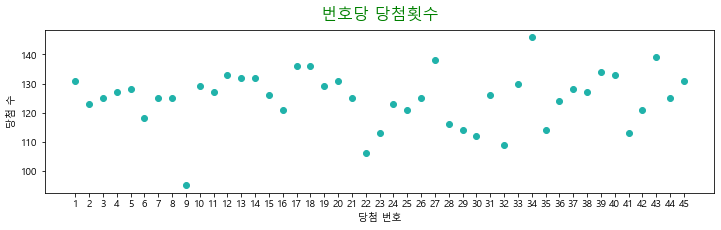

In [92]:
plt.figure(figsize=(12, 3))
plt.scatter(l_s.index, l_s.values,color="lightseagreen")
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(a)
plt.title('번호당 당첨횟수', loc='center', pad=10, fontsize=16, color='g')
plt.show()

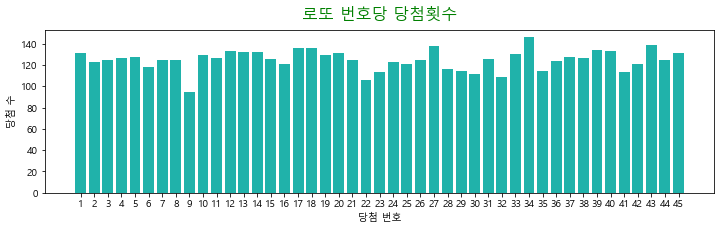

In [94]:
plt.figure(figsize=(12, 3))
plt.bar(l_s.index, l_s.values, color = 'lightseagreen')
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(a)
plt.title('로또 번호당 당첨횟수', loc='center', pad=10, fontsize=16, color='g')
plt.show()

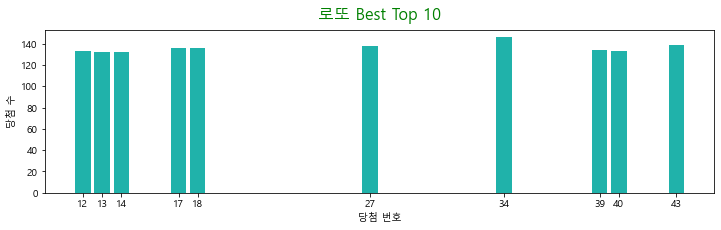

In [146]:
plt.figure(figsize=(12, 3))
plt.bar(l_s.sort_values(ascending = False).head(10).index, l_s.sort_values(ascending = False).head(10), color = 'lightseagreen')
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(l_s.sort_values(ascending = False).head(10).index)
plt.title('로또 Best Top 10', loc='center', pad=10, fontsize=16, color='g')
plt.show()

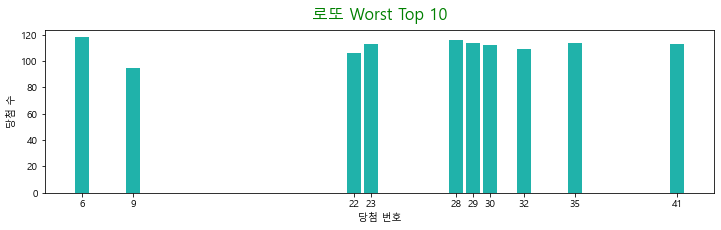

In [147]:
plt.figure(figsize=(12, 3))
plt.bar(l_s.sort_values(ascending = False).tail(10).index, l_s.sort_values(ascending = False).tail(10), color = 'lightseagreen')
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(l_s.sort_values(ascending = False).tail(10).index)
plt.title('로또 Worst Top 10', loc='center', pad=10, fontsize=16, color='g')
plt.show()

#### 2등번호 사용

In [97]:
s_num=pd.read_csv('lotto_nums.csv')
s_dict =dict(s_num['2등번호'].value_counts())
s_s = pd.Series(s_dict)

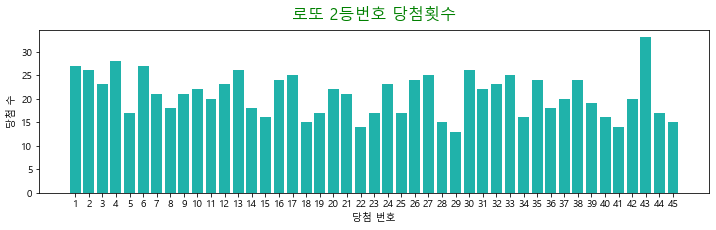

In [98]:
plt.figure(figsize=(12, 3))
plt.bar(s_s.index, s_s.values, color = 'lightseagreen')
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(a)
plt.title('로또 2등번호 당첨횟수', loc='center', pad=10, fontsize=16, color='g')
plt.show()

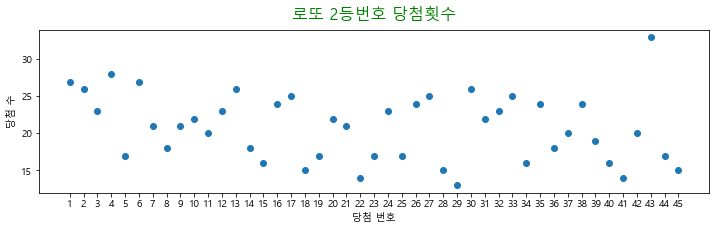

In [141]:
plt.figure(figsize=(12, 3))
plt.scatter(s_s.index, s_s.values)
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(a)
plt.title('로또 2등번호 당첨횟수', loc='center', pad=10, fontsize=16, color='g')
plt.show()

#### 번호당 당첨번호의 갯수를 갖는 시리즈 생성

In [100]:
n1 = dict(nums['번호1'].value_counts())
n1 = pd.Series(n1)
n2 = dict(nums['번호2'].value_counts())
n2 = pd.Series(n2)
n3 = dict(nums['번호3'].value_counts())
n3 = pd.Series(n3)
n4 = dict(nums['번호4'].value_counts())
n4 = pd.Series(n4)
n5 = dict(nums['번호5'].value_counts())
n5 = pd.Series(n5)
n6 = dict(nums['번호6'].value_counts())
n6 = pd.Series(n6)

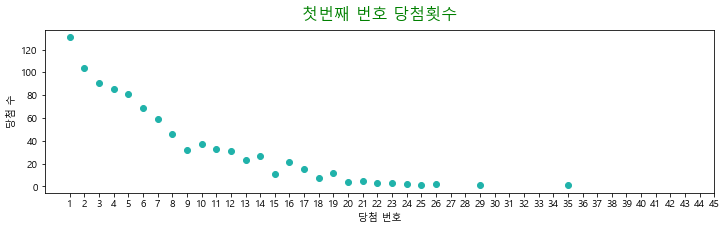

In [102]:
plt.figure(figsize=(12, 3))
plt.scatter(n1.index, n1.values,color="lightseagreen")
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(a)
plt.title('첫번째 번호 당첨횟수', loc='center', pad=10, fontsize=16, color='g')
plt.show()

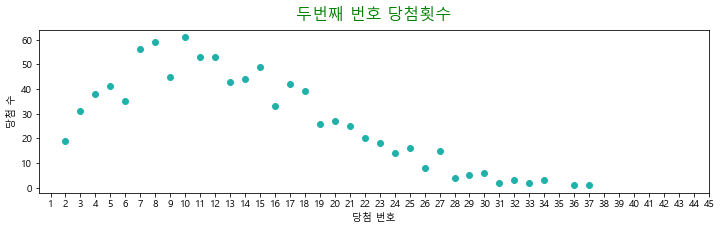

In [103]:
plt.figure(figsize=(12, 3))
plt.scatter(n2.index, n2.values,color="lightseagreen")
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(a)
plt.title('두번째 번호 당첨횟수', loc='center', pad=10, fontsize=16, color='g')
plt.show()

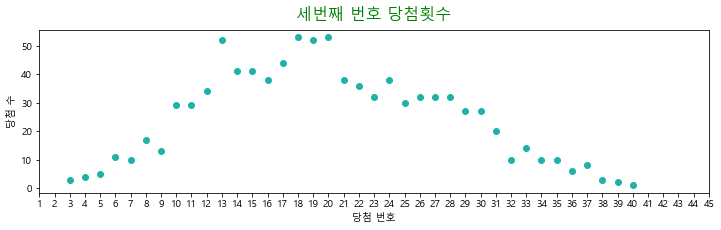

In [104]:
plt.figure(figsize=(12, 3))
plt.scatter(n3.index, n3.values,color="lightseagreen")
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(a)
plt.title('세번째 번호 당첨횟수', loc='center', pad=10, fontsize=16, color='g')
plt.show()

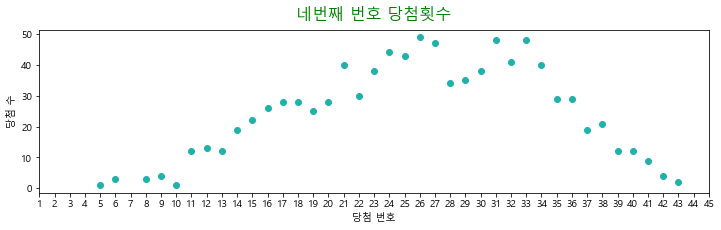

In [106]:
plt.figure(figsize=(12, 3))
plt.scatter(n4.index, n4.values,color="lightseagreen")
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(a)
plt.title('네번째 번호 당첨횟수', loc='center', pad=10, fontsize=16, color='g')
plt.show()

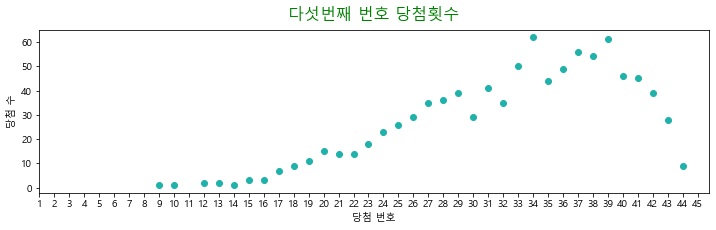

In [109]:
plt.figure(figsize=(12, 3))
plt.scatter(n5.index, n5.values,color="lightseagreen")
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(a)
plt.title('다섯번째 번호 당첨횟수', loc='center', pad=10, fontsize=16, color='g')
plt.show()

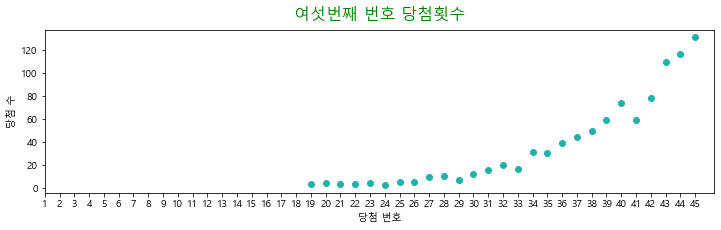

In [110]:
plt.figure(figsize=(12, 3))
plt.scatter(n6.index, n6.values,color="lightseagreen")
plt.xlabel('당첨 번호')
plt.ylabel('당첨 수')
plt.xticks(a)
plt.title('여섯번째 번호 당첨횟수', loc='center', pad=10, fontsize=16, color='g')
plt.show()

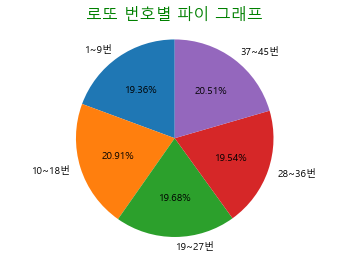

In [148]:
using = [l_s[1:9].sum(),l_s[10:18].sum(),l_s[19:27].sum(),l_s[28:36].sum(),l_s[37:45].sum()]
labels = ['1~9번', '10~18번', '19~27번', '28~36번','37~45번']
plt.pie(using,autopct='%.2f%%',startangle=90,labels=labels)
plt.title('로또 번호별 파이 그래프', loc='center', pad=10, fontsize=16, color='g')
plt.axis('equal')
plt.show()

### 당첨금 그래프

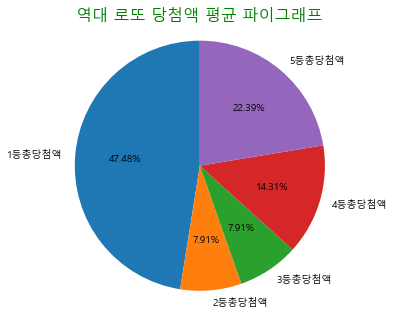

In [114]:
plt.figure(figsize=(5, 5))
using = [prize['1등총당첨액'].mean(),prize['2등총당첨액'].mean(),prize['3등총당첨액'].mean(),prize['4등총당첨액'].mean(),prize['5등총당첨액'].mean()]
labels = ['1등총당첨액', '2등총당첨액', '3등총당첨액', '4등총당첨액','5등총당첨액']
plt.title('역대 로또 당첨액 평균 파이그래프', loc='center', pad=10, fontsize=16, color='g')
plt.pie(using,autopct='%.2f%%',startangle=90,labels=labels)
plt.axis('equal')
plt.show()

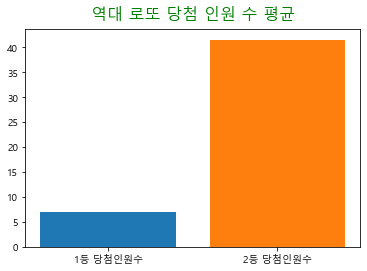

In [115]:
plt.bar('1등 당첨인원수', prize['1등당첨인원수'].mean())
plt.bar('2등 당첨인원수', prize['2등당첨인원수'].mean())
plt.title('역대 로또 당첨 인원 수 평균', loc='center', pad=10, fontsize=16, color='g')
plt.show()

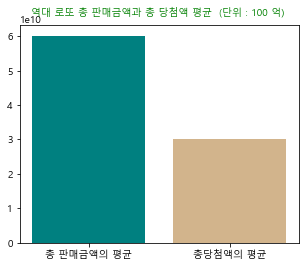

In [116]:
plt.figure(figsize=(5, 4))
plt.bar('총 판매금액의 평균', prize['총판매금액'].mean(),color = 'teal')
plt.bar('총 판매금액의 평균', prize['총판매금액'].mean(),color = 'teal')
plt.bar('총당첨액의 평균', (prize['1등총당첨액'].mean()+prize['2등총당첨액'].mean()+prize['3등총당첨액'].mean()+prize['4등총당첨액'].mean()+prize['5등총당첨액'].mean()),color = 'tan')
plt.title('역대 로또 총 판매금액과 총 당첨액 평균  (단위 : 100 억) ', loc='center', pad=10, fontsize=10, color='g')
plt.show()

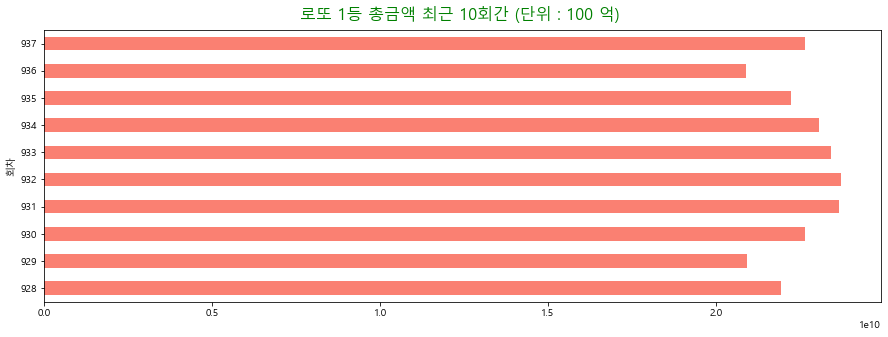

In [123]:
plt.figure(figsize=(15, 5))
prize['1등총당첨액'][-10:].plot.barh(color='salmon')
plt.title('로또 1등 총금액 최근 10회간 (단위 : 100 억) ',loc='center', pad=10, fontsize=16, color='g')
plt.show()

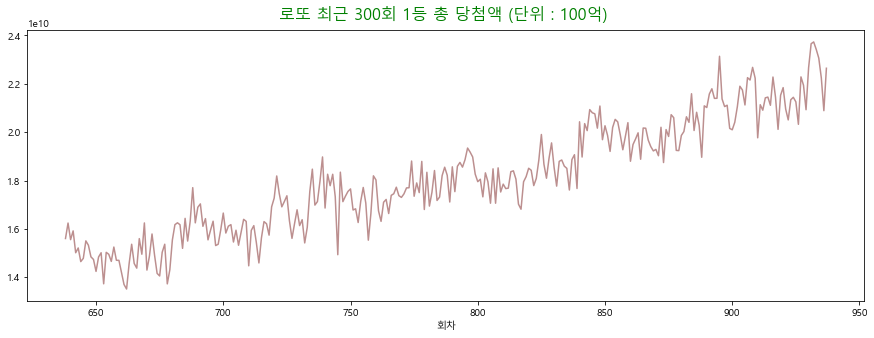

In [140]:
plt.figure(figsize=(15, 5))
plt.title('로또 최근 300회 1등 총 당첨액 (단위 : 100억) ',loc='center', pad=10, fontsize=16, color='g')
plt.title('로또 최근 300회 1등 총 당첨액 (단위 : 100억) ',loc='center', pad=10, fontsize=16, color='g')
prize['1등총당첨액'][-300:].plot(color='rosybrown')
plt.show()

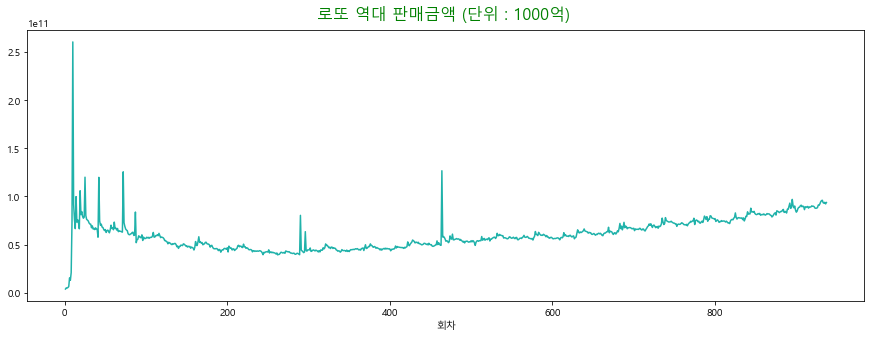

In [132]:
plt.figure(figsize=(15, 5))
plt.title('로또 역대 판매금액 (단위 : 1000억) ',loc='center', pad=10, fontsize=16, color='g')
prize['총판매금액'].plot(color="lightseagreen")
plt.show()